<a href="https://colab.research.google.com/github/ykato27/KNearestNeighbors_AnomalyDetection/blob/main/KNearestNeighbors_AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 必要なライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv('qtdbsel102.txt', header=None, delimiter='\t')
print(df.shape)

(45000, 3)


In [3]:
# dataをsize毎のスライス窓に分割
def embed(data, size):
    window = np.empty((0, size))
    for index in range(0, len(data)-size+1):
        new_window = [data[i] for i in range(index, index+size)]
        window = np.append(window, np.array([new_window]), axis=0)
    return window

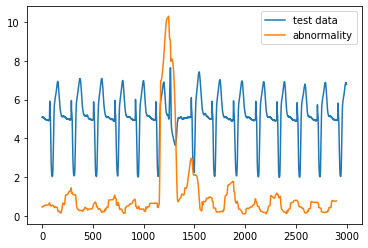

In [4]:
# 前から3000件を学習データ、その次の3000件をテストデータとする
train = df.loc[:2999, 2]
test = df.loc[3000:5999, 2].reset_index(drop=True)

# サイズ100のスライス窓に分割
train_window = embed(train.values, 100)
test_window = embed(test.values, 100)

# 学習データでモデルを生成し、学習データについて異常度（最近傍までの距離を）算出
nbrs = NearestNeighbors(n_neighbors=1, n_jobs=-1).fit(train_window)
distances, indices = nbrs.kneighbors(test_window)

# テストデータと異常度のプロット
plt.plot(test)
plt.plot(distances)
plt.legend(["test data", "abnormality"])